# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.6.0-delta.new.72.fix.120.155.157'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

185

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

5

In [8]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{9: ['Romania', 'Guinea', 'Senegal', 'Iran'], 10: ['Poland']}

In [9]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Poland  1st    Past  23Apr2020  03May2020    37974750
        2nd    Past  04May2020  13May2020    37974750
        3rd    Past  14May2020  23May2020    37974750
        4th    Past  24May2020  02Jun2020    37974750
        5th    Past  03Jun2020  12Jun2020    37974750
        6th    Past  13Jun2020  22Jun2020    37974750
        7th    Past  23Jun2020  01Jul2020    37974750
        8th    Past  02Jul2020  12Jul2020    37974750
        9th    Past  13Jul2020  21Jul2020    37974750
        10th   Past  22Jul2020  01Aug2020    37974750

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [10]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


--------------------Romania--------------------


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	9th phase with SIR-F model finished 193 trials in 0 min 5 sec.

	2nd phase with SIR-F model finished 132 trials in 0 min 10 sec.

	3rd phase with SIR-F model finished 136 trials in 0 min 10 sec.

	7th phase with SIR-F model finished 67 trials in 0 min 5 sec.

	4th phase with SIR-F model finished 124 trials in 0 min 10 sec.

	8th phase with SIR-F model finished 70 trials in 0 min 5 sec.

	5th phase with SIR-F model finished 139 trials in 0 min 10 sec.

	1st phase with SIR-F model finished 221 trials in 0 min 15 sec.

	6th phase with SIR-F model finished 149 trials in 0 min 10 sec.

Completed optimization. Total: 0 min 22 sec


--------------------Guinea--------------------


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	9th phase with SIR-F model finished 118 trials in 0 min 5 sec.

	3rd phase with SIR-F model finished 148 trials in 0 min 10 sec.

	1st phase with SIR-F model finished 222 trials in 0 min 15 sec.

	7th phase with SIR-F model finished 139 trials in 0 min 10 sec.

	2nd phase with SIR-F model finished 211 trials in 0 min 15 sec.

	8th phase with SIR-F model finished 132 trials in 0 min 10 sec.

	4th phase with SIR-F model finished 218 trials in 0 min 15 sec.

	5th phase with SIR-F model finished 218 trials in 0 min 15 sec.

	6th phase with SIR-F model finished 327 trials in 0 min 20 sec.

Completed optimization. Total: 0 min 32 sec


--------------------Senegal--------------------


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	9th phase with SIR-F model finished 309 trials in 0 min 10 sec.

	2nd phase with SIR-F model finished 163 trials in 0 min 10 sec.

	6th phase with SIR-F model finished 138 trials in 0 min 10 sec.

	1st phase with SIR-F model finished 233 trials in 0 min 15 sec.

	3rd phase with SIR-F model finished 215 trials in 0 min 15 sec.

	4th phase with SIR-F model finished 212 trials in 0 min 15 sec.

	5th phase with SIR-F model finished 203 trials in 0 min 15 sec.

	7th phase with SIR-F model finished 211 trials in 0 min 15 sec.

	8th phase with SIR-F model finished 227 trials in 0 min 15 sec.

Completed optimization. Total: 0 min 34 sec


--------------------Iran--------------------


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	9th phase with SIR-F model finished 119 trials in 0 min 5 sec.

	3rd phase with SIR-F model finished 82 trials in 0 min 5 sec.

	5th phase with SIR-F model finished 70 trials in 0 min 5 sec.

	6th phase with SIR-F model finished 70 trials in 0 min 5 sec.

	7th phase with SIR-F model finished 65 trials in 0 min 5 sec.

	2nd phase with SIR-F model finished 155 trials in 0 min 10 sec.

	8th phase with SIR-F model finished 71 trials in 0 min 5 sec.

	4th phase with SIR-F model finished 144 trials in 0 min 10 sec.

	1st phase with SIR-F model finished 1467 trials in 1 min 0 sec.

Completed optimization. Total: 1 min 8 sec


--------------------Poland--------------------


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	10th phase with SIR-F model finished 130 trials in 0 min 5 sec.

	1st phase with SIR-F model finished 158 trials in 0 min 10 sec.

	2nd phase with SIR-F model finished 149 trials in 0 min 10 sec.

	6th phase with SIR-F model finished 138 trials in 0 min 10 sec.

	7th phase with SIR-F model finished 129 trials in 0 min 10 sec.

	3rd phase with SIR-F model finished 214 trials in 0 min 15 sec.

	4th phase with SIR-F model finished 207 trials in 0 min 15 sec.

	5th phase with SIR-F model finished 201 trials in 0 min 15 sec.

	9th phase with SIR-F model finished 152 trials in 0 min 10 sec.

	8th phase with SIR-F model finished 222 trials in 0 min 15 sec.

Completed optimization. Total: 0 min 29 sec

In [11]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE       rho  \
Country Phase                                                            
Poland  1st    Past  23Apr2020  03May2020    37974750  SIR-F  0.009761   
        2nd    Past  04May2020  13May2020    37974750  SIR-F  0.008475   
        3rd    Past  14May2020  23May2020    37974750  SIR-F  0.009503   
        4th    Past  24May2020  02Jun2020    37974750  SIR-F  0.007224   
        5th    Past  03Jun2020  12Jun2020    37974750  SIR-F  0.009647   
        6th    Past  13Jun2020  22Jun2020    37974750  SIR-F  0.006882   
        7th    Past  23Jun2020  01Jul2020    37974750  SIR-F  0.005648   
        8th    Past  02Jul2020  12Jul2020    37974750  SIR-F  0.006856   
        9th    Past  13Jul2020  21Jul2020    37974750  SIR-F  0.008754   
        10th   Past  22Jul2020  01Aug2020    37974750  SIR-F  0.013705   

                  sigma     theta     kappa  tau    Rt  alpha1 [-]  \
Country Phase                                                        
Poland  1st    0.006304  0.051764  0.000482  360  1.36       0.052   
        2nd    0.007261  0.061668  0.000109  360  1.08       0.062   
        3rd    0.006406  0.023906  0.000014  360  1.44       0.024   
        4th    0.006363  0.048136  0.000014  360  1.08       0.048   
        5th    0.004337  0.023906  0.000014  360  2.16       0.024   
        6th    0.005802  0.001911  0.000093  360  1.17       0.002   
        7th    0.010500  0.011309  0.000692  360  0.50       0.011   
        8th    0.011620  0.039107  0.000191  360  0.56       0.039   
        9th    0.012755  0.002107  0.000079  360  0.68       0.002   
        10th   0.009471  0.001229  0.000528  360  1.37       0.001   

               1/alpha2 [day]  1/beta [day]  1/gamma [day]     RMSLE  Trials  \
Country Phase                                                                  
Poland  1st               518            25             39  0.062845     158   
        2nd              2287            29             34  0.034631     149   
        3rd             17575            26             39  0.016598     214   
        4th             17635            34             39  0.025189     207   
        5th             17575            25             57  0.010449     201   
        6th              2698            36             43  0.032513     138   
        7th               361            44             23  0.051499     129   
        8th              1305            36             21  0.032140     222   
        9th              3152            28             19  0.017659     152   
        10th              473            18             26  0.034256     130   

                    Runtime  
Country Phase                
Poland  1st    0 min 10 sec  
        2nd    0 min 10 sec  
        3rd    0 min 15 sec  
        4th    0 min 15 sec  
        5th    0 min 15 sec  
        6th    0 min 10 sec  
        7th    0 min 10 sec  
        8th    0 min 15 sec  
        9th    0 min 10 sec  
        10th    0 min 5 sec

## Compare the history of parameters
Here, compare the history of parameter values if countries.

### $Rt$: Reprodcution number $\mathrm{[-]}$

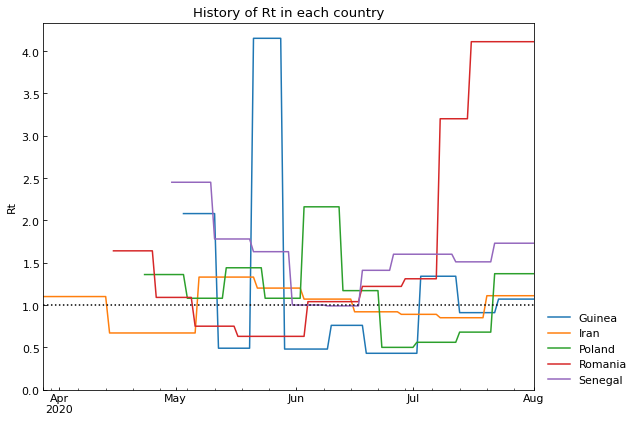

Country,Guinea,Iran,Poland,Romania,Senegal
Date,,,,,
2020-07-28,1.07,1.11,1.37,4.11,1.73
2020-07-29,1.07,1.11,1.37,4.11,1.73
2020-07-30,1.07,1.11,1.37,4.11,1.73
2020-07-31,1.07,1.11,1.37,4.11,1.73
2020-08-01,1.07,1.11,1.37,4.11,1.73


In [12]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

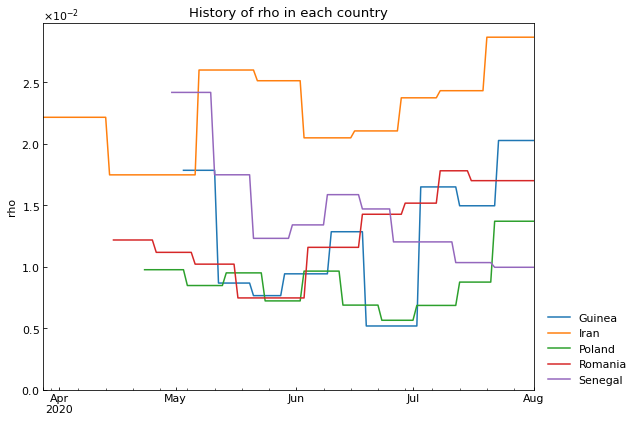

Country,Guinea,Iran,Poland,Romania,Senegal
Date,,,,,
2020-07-28,0.020272,0.028676,0.013705,0.017005,0.009959
2020-07-29,0.020272,0.028676,0.013705,0.017005,0.009959
2020-07-30,0.020272,0.028676,0.013705,0.017005,0.009959
2020-07-31,0.020272,0.028676,0.013705,0.017005,0.009959
2020-08-01,0.020272,0.028676,0.013705,0.017005,0.009959


In [13]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

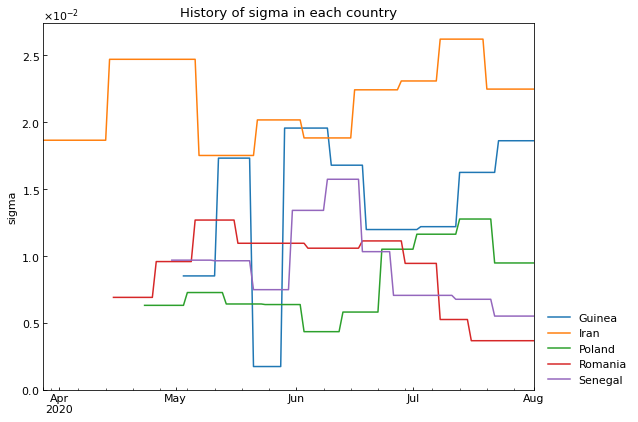

Country,Guinea,Iran,Poland,Romania,Senegal
Date,,,,,
2020-07-28,0.018604,0.022464,0.009471,0.003661,0.005501
2020-07-29,0.018604,0.022464,0.009471,0.003661,0.005501
2020-07-30,0.018604,0.022464,0.009471,0.003661,0.005501
2020-07-31,0.018604,0.022464,0.009471,0.003661,0.005501
2020-08-01,0.018604,0.022464,0.009471,0.003661,0.005501


In [14]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

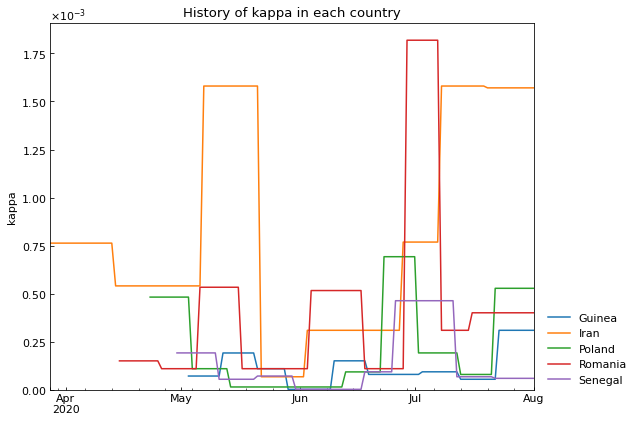

Country,Guinea,Iran,Poland,Romania,Senegal
Date,,,,,
2020-07-28,0.000309,0.001571,0.000528,0.0004,0.000059
2020-07-29,0.000309,0.001571,0.000528,0.0004,0.000059
2020-07-30,0.000309,0.001571,0.000528,0.0004,0.000059
2020-07-31,0.000309,0.001571,0.000528,0.0004,0.000059
2020-08-01,0.000309,0.001571,0.000528,0.0004,0.000059


In [15]:
analyser.param_history("kappa", roll_window=None).tail()

 ### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

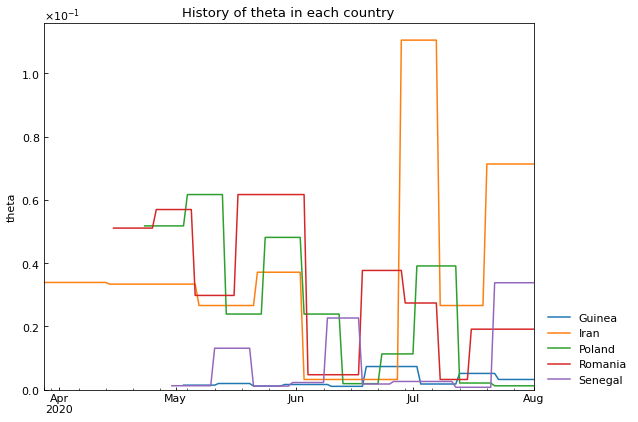

Country,Guinea,Iran,Poland,Romania,Senegal
Date,,,,,
2020-07-28,0.003232,0.071322,0.001229,0.019125,0.033798
2020-07-29,0.003232,0.071322,0.001229,0.019125,0.033798
2020-07-30,0.003232,0.071322,0.001229,0.019125,0.033798
2020-07-31,0.003232,0.071322,0.001229,0.019125,0.033798
2020-08-01,0.003232,0.071322,0.001229,0.019125,0.033798


In [16]:
analyser.param_history("theta", roll_window=None).tail()